In [1]:
import copy
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none'

In [10]:
df

Approx Bd                     Approx dB                      \
      s = 0.01  s = 0.05   s = 0.1  s = 0.01  s = 0.05   s = 0.1   
0     0.012022  0.057503  0.109034  0.001422  0.003974  0.008024   
1     0.014688  0.070150  0.132751  0.001036  0.001184  0.001374   
2     0.014761  0.070523  0.133508  0.001036  0.001185  0.001375   
3     0.011962  0.057232  0.108553  0.001260  0.002724  0.005204   
4     0.010581  0.050696  0.096319  0.006096  0.030052  0.058908   
...        ...       ...       ...       ...       ...       ...   
6895  0.009686  0.046682  0.089279  0.009187  0.044336  0.084941   
6896  0.009740  0.046909  0.089651  0.009250  0.044620  0.085445   
6897  0.009708  0.046771  0.089416  0.009148  0.044144  0.084565   
6898  0.009755  0.046973  0.089755  0.009215  0.044453  0.085127   
6899  0.009737  0.046896  0.089623  0.009161  0.044197  0.084649   

     Degree distribution                               ...  \
                      -1        -2      A_bd    First  ...   
0               0.417350  0.190549  1.215867    3.994  ...   
1               0.496469  0.247619  1.486052    3.994  ...   
2               0.496195  0.247383  1.493272    3.994  ...   
3               0.421336  0.192625  1.209775    3.994  ...   
4               0.342365  0.138713  1.069700    3.994  ...   
...                  ...       ...       ...      ...  ...   
6895            0.002763  0.000008  0.977605  395.556  ...   
6896            0.002703  0.000008  0.983227  400.024  ...   
6897            0.002542  0.000007  0.979899  431.934  ...   
6898            0.002565  0.000007  0.984843  422.764  ...   
6899            0.002447  0.000007  0.982981  447.138  ...   

                         Graph Info                                  \
                     File Locations  Size Subtype              Type   
0          old_mv/graphs_1000/0.txt  1000    None      Preferential   
1          old_mv/graphs_1000/1.txt  1000    None      Preferential   
2          old_mv/graphs_1000/2.txt  1000    None      Preferential   
3          old_mv/graphs_1000/3.txt  1000    None      Preferential   
4          old_mv/graphs_1000/4.txt  1000    None      Preferential   
...                             ...   ...     ...               ...   
6895  rgg_graphs_normal_var/395.txt  1000  Normal  Random Geometric   
6896  rgg_graphs_normal_var/396.txt  1000  Normal  Random Geometric   
6897  rgg_graphs_normal_var/397.txt  1000  Normal  Random Geometric   
6898  rgg_graphs_normal_var/398.txt  1000  Normal  Random Geometric   
6899  rgg_graphs_normal_var/399.txt  1000  Normal  Random Geometric   

     Probability of fixation                       pfix db                      
                    s = 0.01  s = 0.05   s = 0.1  s = 0.01  s = 0.05   s = 0.1  
0                        NaN       NaN       NaN       NaN       NaN       NaN  
1                        NaN       NaN       NaN       NaN       NaN       NaN  
2                        NaN       NaN       NaN       NaN       NaN       NaN  
3                        NaN       NaN       NaN       NaN       NaN       NaN  
4                        NaN       NaN       NaN       NaN       NaN       NaN  
...                      ...       ...       ...       ...       ...       ...  
6895                0.009742  0.046898  0.089498  0.009172  0.044280  0.085132  
6896                0.009814  0.047228  0.089908  0.009287  0.044349  0.085243  
6897                0.009765  0.046450  0.089474  0.009367  0.044181  0.084182  
6898                0.009749  0.047074  0.090393  0.009011  0.044418  0.085069  
6899                0.009835  0.046696  0.089711  0.009132  0.044287  0.084345  

[6900 rows x 22 columns]

In [56]:
"""
c = ['#55a868',
 '#dd8452',
 '#4c72b0',
 '#c44e52',
 '#8172b3',
 '#d5ff2e',
 '#88419d',
 '#89cff0',
 '#ccb974',
 '#64b5cd']
"""
c = ['#4c72b0',
 '#dd8452',
 '#55a868',
 '#c44e52',
 '#8172b3',
 '#d5ff2e',
 '#88419d',
 '#045a8d',
 '#ccb974',
 '#64b5cd']


sns.set_palette(c)

path = ''
df = pd.read_pickle(path + "paper_data.pkl")

df_1000 = df.loc[df[('Graph Info', 'Size')].values.astype(int) == 1000]

subs = ['Normal', 'Uniform']
types = ['Preferential', 'Waxman', 'Small World', 'Erdoes Renyi', 
         'Geometric Threshold', 'Power-law Cluster']

/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_65724/1256342767.py:50: RuntimeWarning: invalid value encountered in divide
  approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))


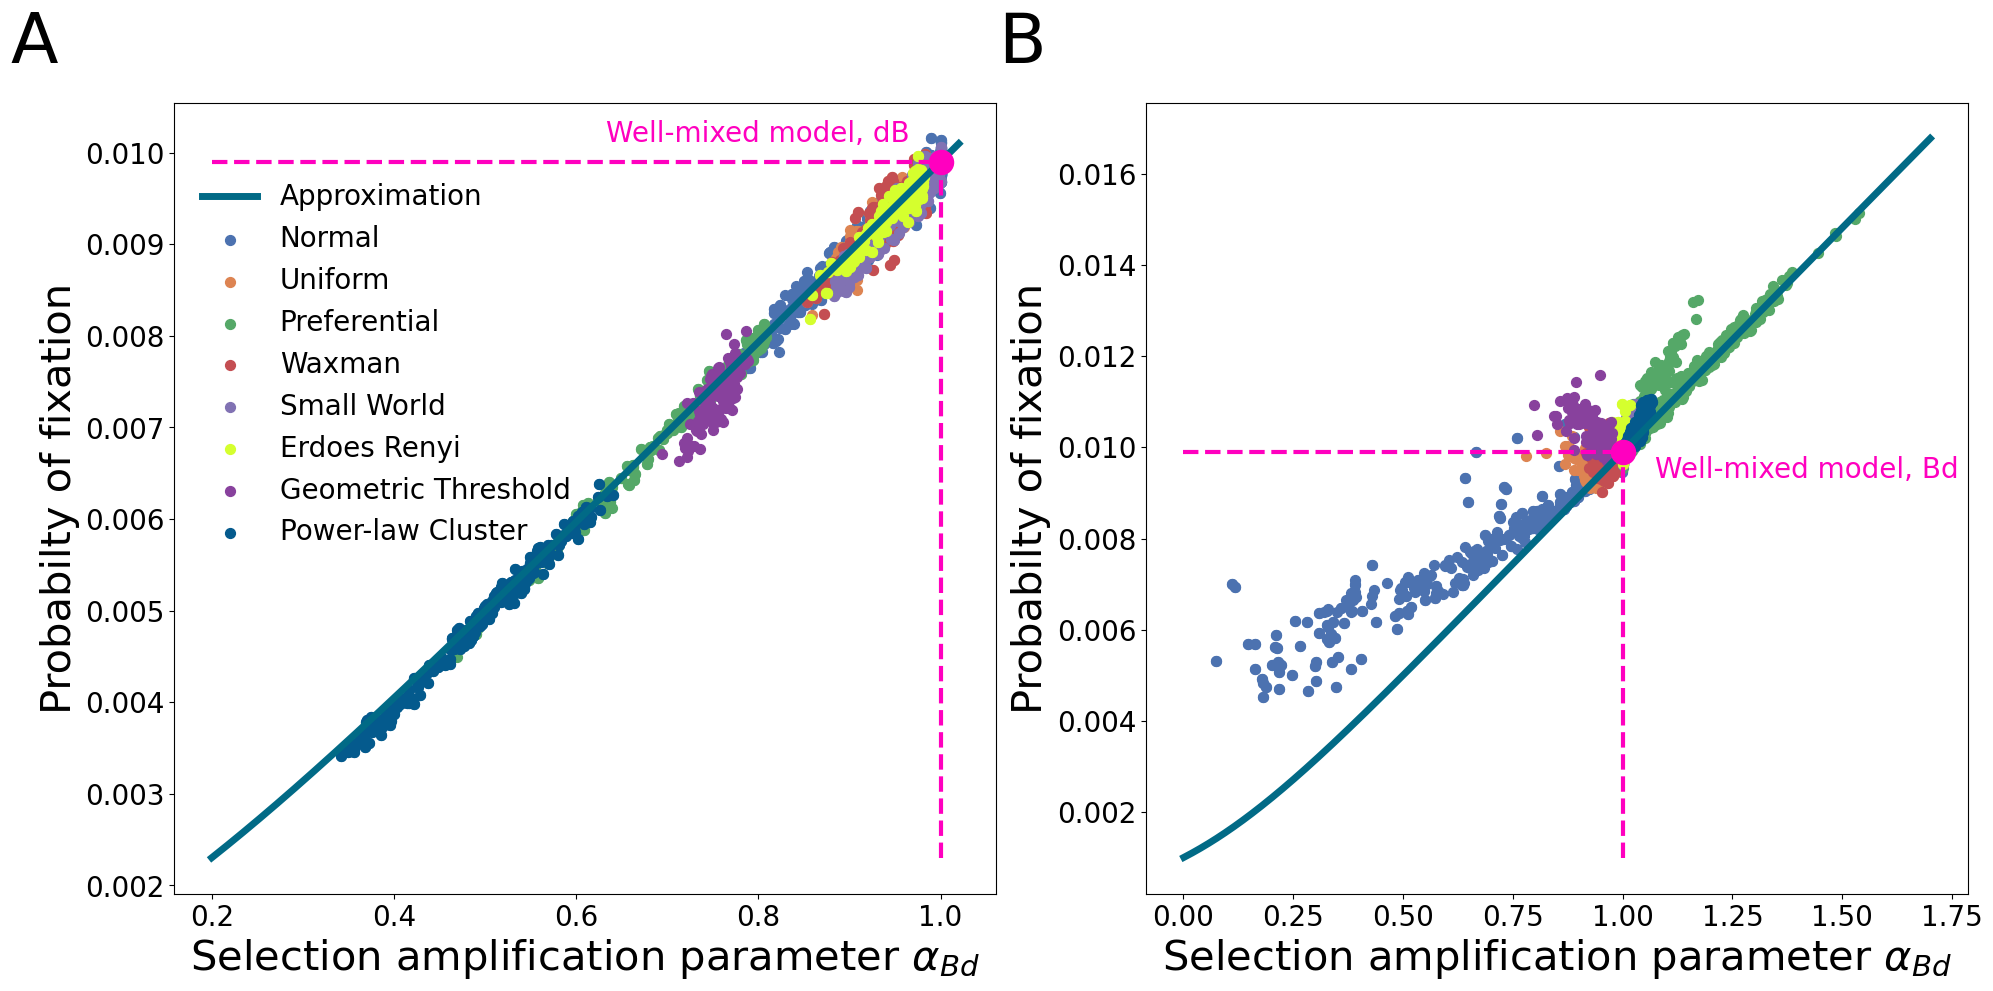

In [57]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)

alpha = np.linspace(.2,1.02,1000)

s = 0.01
approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))

plt.plot(alpha, approx, color = '#016a86', linewidth = 5, label = 'Approximation' )

plt.text(0.525, 0.95, "Well-mixed model, dB", color = '#FF00Bf', fontsize = 20,
         transform = ax.transAxes)
plt.scatter([1], [0.0099014], #label = 'Well-mixed', 
         color = '#FF00Bf', s = 300, zorder = 3)

plt.plot([0.2, 1], [0.0099014, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')
plt.plot([1, 1], [approx.min(), 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')

for s in subs:
    xy = df_1000.loc[df[('Graph Info', 'Subtype')] == s]
    y = xy['Degree distribution', 'First'] ** 2
    y = y / (xy['Degree distribution', 'Second'] + y)
    plt.scatter(y, xy['pfix db', 's = 0.01'], label = s, s = 50)
    
for t in types:
    xy = df_1000.loc[df[('Graph Info', 'Type')] == t]
    y = xy['Degree distribution', 'First'] ** 2
    y = y / (xy['Degree distribution', 'Second'] + y)
    plt.scatter(y, xy['pfix db', 's = 0.01'], label = t, s = 50)

plt.legend(fontsize = 20, loc = (0.02 ,0.425), frameon=False)
#plt.xlabel('Selection amplification parameter $\\alpha_{dB} = \\frac{\\langle d \\rangle^2}{\\langle d^2 \\rangle}$', 
plt.xlabel('Selection amplification parameter $\\alpha_{Bd}$',fontsize = 30)
plt.ylabel('Probabilty of fixation', fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.text(-0.2, 1.05, 'A', fontsize = 50, transform=ax.transAxes)

##########################################################
##########################################################
ax = fig.add_subplot(122)

alpha = np.linspace(0,1.7,1000)

s = 0.01
approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))
plt.text(0.62, 0.525, "Well-mixed model, Bd", color = '#FF00Bf', fontsize = 20,
         transform = ax.transAxes)
plt.scatter([1], [0.0099014], #label = 'Well-mixed', 
         color = '#FF00Bf', s = 300, zorder = 3)

plt.plot([0, 1], [0.0099014, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')
plt.plot([1, 1], [0.001, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')

plt.plot(alpha, approx, color = '#016a86', linewidth = 5, label = 'Approximation' )

for s in subs:
    xy = df_1000.loc[df[('Graph Info', 'Subtype')] == s]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = s, s = 50)
 
for t in types:
    xy = df_1000.loc[df[('Graph Info', 'Type')] == t]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = t, s = 50)

plt.xlabel('Selection amplification parameter $\\alpha_{Bd}$',fontsize = 30)
plt.ylabel('Probabilty of fixation', fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.text(-0.18, 1.05, 'B', fontsize = 50, transform=ax.transAxes)


plt.tight_layout()
plt.savefig('Figure3_All.pdf', bbox_inches= "tight", pad_inches=0.1)
plt.show()

/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_43850/3063415546.py:7: RuntimeWarning: invalid value encountered in divide
  approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))
/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_43850/3063415546.py:49: RuntimeWarning: invalid value encountered in divide
  approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))


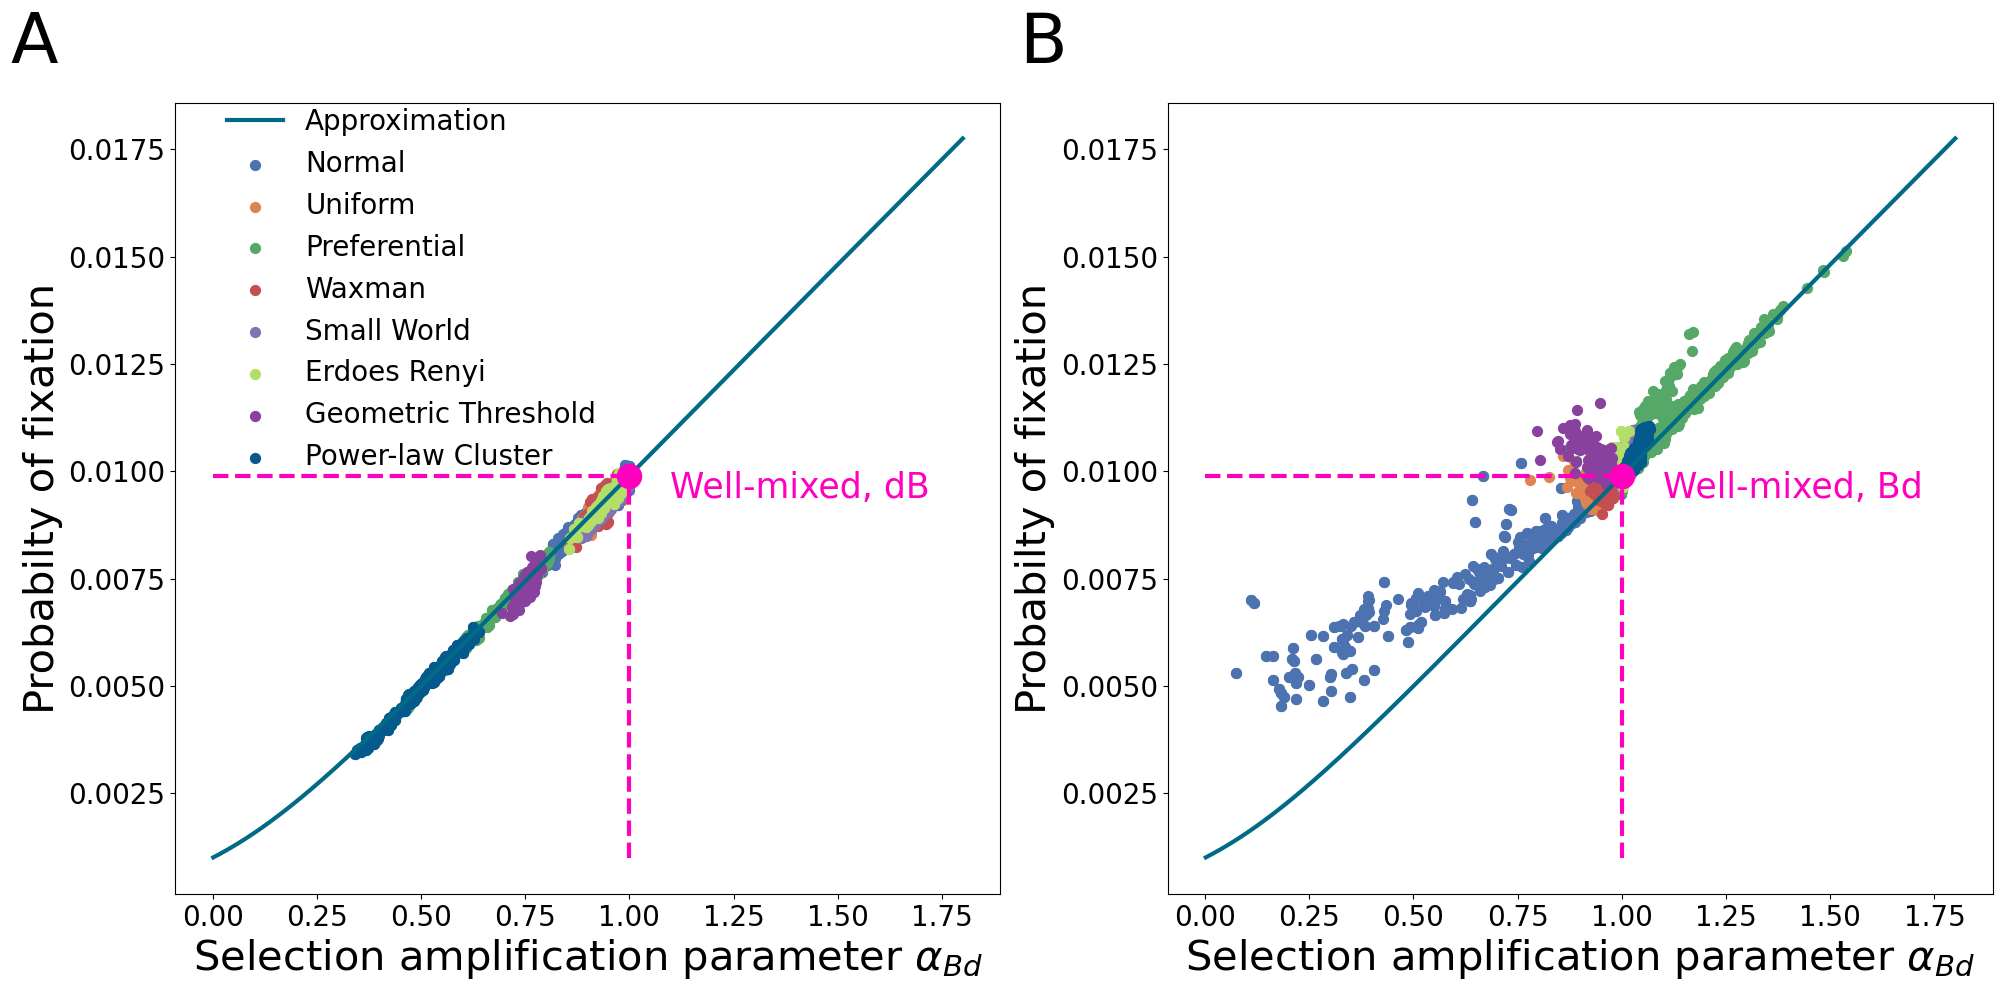

In [34]:
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(121)

alpha = np.linspace(0,1.8,1000)

s = 0.01
approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))
plt.plot(alpha, approx, color = '#016a86', linewidth = 3.0, label = 'Approximation' )

plt.text(0.6, 0.5, "Well-mixed, dB", color = '#FF00Bf', fontsize = 25,
         transform = ax.transAxes)
plt.scatter([1], [0.0099014], #label = 'Well-mixed', 
         color = '#FF00Bf', s = 300, zorder = 3)

plt.plot([0, 1], [0.0099014, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')
plt.plot([1, 1], [0.001, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')

for s in subs:
    xy = df_1000.loc[df[('Graph Info', 'Subtype')] == s]
    y = xy['Degree distribution', 'First'] ** 2
    y = y / (xy['Degree distribution', 'Second'] + y)
    plt.scatter(y, xy['pfix db', 's = 0.01'], label = s, s = 50)
    
for t in types:
    xy = df_1000.loc[df[('Graph Info', 'Type')] == t]
    y = xy['Degree distribution', 'First'] ** 2
    y = y / (xy['Degree distribution', 'Second'] + y)
    plt.scatter(y, xy['pfix db', 's = 0.01'], label = t, s = 50)
    
#plt.xlabel('Selection amplification parameter $\\alpha_{dB} = \\frac{\\langle d \\rangle^2}{\\langle d^2 \\rangle}$', 
plt.legend(fontsize = 20, loc = (0.05 ,0.52), frameon=False)
plt.xlabel('Selection amplification parameter $\\alpha_{Bd}$',fontsize = 30)
plt.ylabel('Probabilty of fixation', fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.text(-0.2, 1.05, 'A', fontsize = 50, transform=ax.transAxes)

##########################################################
##########################################################
ax = fig.add_subplot(122)

alpha = np.linspace(0,1.8,1000)

s = 0.01
approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))
plt.text(0.6, 0.5, "Well-mixed, Bd", color = '#FF00Bf', fontsize = 25,
         transform = ax.transAxes)
plt.scatter([1], [0.0099014], #label = 'Well-mixed', 
         color = '#FF00Bf', s = 300, zorder = 3)

plt.plot([0, 1], [0.0099014, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')
plt.plot([1, 1], [0.001, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')

plt.plot(alpha, approx, color = '#016a86', linewidth = 3.0, label = 'Approximation' )

for s in subs:
    xy = df_1000.loc[df[('Graph Info', 'Subtype')] == s]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = s, s = 50)
 
for t in types:
    xy = df_1000.loc[df[('Graph Info', 'Type')] == t]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = t, s = 50)

plt.xlabel('Selection amplification parameter $\\alpha_{Bd}$',fontsize = 30)
plt.ylabel('Probabilty of fixation', fontsize = 30)

plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.text(-0.18, 1.05, 'B', fontsize = 50, transform=ax.transAxes)


plt.tight_layout()
plt.savefig('fig_approx_match_y.pdf', bbox_inches= "tight", pad_inches=0.1)
plt.show()


/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_42229/113643586.py:5: RuntimeWarning: invalid value encountered in divide
  approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))


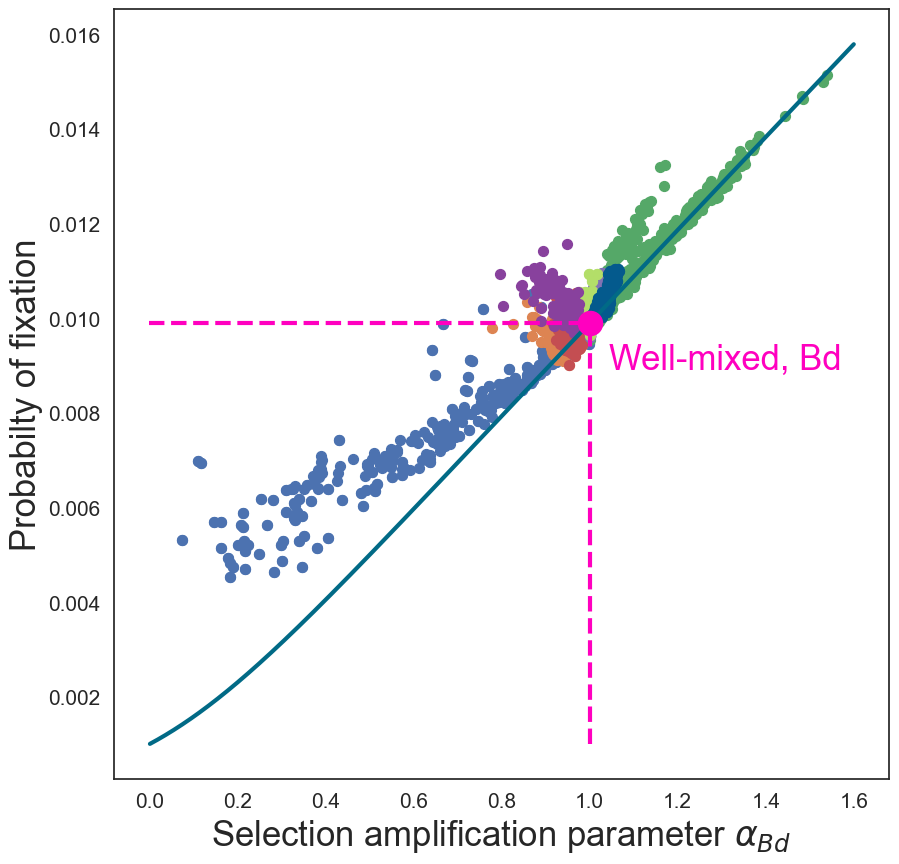

In [75]:
plt.figure(figsize = (10,10))
alpha = np.linspace(0,1.6,1000)

s = 0.01
approx = (1 - np.exp(-s / (1 + s / 2) * alpha)) / (1 - np.exp(-s / (1 + s / 2) * 1000 * alpha))
plt.text(0.625, 0.5, "Well-mixed, Bd", color = '#FF00Bf', fontsize = 25,
         transform = ax.transAxes)
plt.scatter([1], [0.0099014], #label = 'Well-mixed', 
         color = '#FF00Bf', s = 300, zorder = 3)

plt.plot([0, 1], [0.0099014, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')
plt.plot([1, 1], [0.001, 0.0099014],
         color = '#FF00Bf', linewidth = 3.0, linestyle = '--')

plt.plot(alpha, approx, color = '#016a86', linewidth = 3.0, label = 'Approximation' )

for s in subs:
    xy = df_1000.loc[df[('Graph Info', 'Subtype')] == s]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = s, s = 50)
 
for t in types:
    xy = df_1000.loc[df[('Graph Info', 'Type')] == t]
    plt.scatter(xy['Degree distribution', 'A_bd'], 
                    xy['Probability of fixation', 's = 0.01'], label = t, s = 50)

plt.xlabel('Selection amplification parameter $\\alpha_{Bd}$',fontsize = 25)
plt.ylabel('Probabilty of fixation', fontsize = 25)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.savefig('fig_approx_bd.pdf', fmt = 'pdf', bbox_inches = "tight", pad_inches=0.1)
plt.show()
